In [9]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format 
sns.set(style = 'white')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
# setting the display properties
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 9999)

### Data Understanding & Preparation

## Change the path to Normal Path before submitting

In [11]:
# Reading data from csv
df=pd.read_csv('F:\\DS\\Notes\\Course 5 - PA II\\Module 7 - Telecom Churn Case Study\\telecom_churn_data_case_study.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [12]:
# Checking the number of rows & columns
df.shape

(99999, 226)

In [13]:
# Checking the column types and nulls
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [14]:
#Let's have a look at the dataset
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [15]:
#Creating function for getting null values percentage
def getNullPercentages(dataFrame):
    df = pd.isnull(dataFrame).sum().reset_index()
    length = len(dataFrame)
    df.rename(columns = {'index':'columnName',0:'nullPercentage'}, inplace = True)
    df['nullPercentage'] = np.round(df['nullPercentage']/length*100,2)
    return df.sort_values(ascending = False, by = 'nullPercentage')

In [16]:
# Checking the null values
getNullPercentages(df)

,columnName,nullPercentage
189,arpu_3g_6,74.85
197,night_pck_user_6,74.85
161,total_rech_data_6,74.85
193,arpu_2g_6,74.85
165,max_rech_data_6,74.85
217,fb_user_6,74.85
177,av_rech_amt_data_6,74.85
157,date_of_last_rech_data_6,74.85
169,count_rech_2g_6,74.85
173,count_rech_3g_6,74.85


#### As we see above, there are lot of null values, we'll handle them moving on. Let's explore the dataset at first

In [17]:
# Getting some statistical insights
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### As we see from the above results, column circle_id, loc_og_t20_mou, & many more has 0 variance, we'll remove these columns moving on. As columns with 0 variance won't be contributing to the model's accuracy.

In [18]:
#Filtering columns realted to recharges
for x in filter(lambda x: 'rech' in x, df.columns):
    print(x)

total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_num_9
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
max_rech_amt_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9
total_rech_data_6
total_rech_data_7
total_rech_data_8
total_rech_data_9
max_rech_data_6
max_rech_data_7
max_rech_data_8
max_rech_data_9
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_2g_9
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
count_rech_3g_9
av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8
av_rech_amt_data_9


In [19]:
#Filtering columns realted to amount
for x in filter(lambda x: 'amt' in x, df.columns):
    print(x)

total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
max_rech_amt_9
last_day_rch_amt_6
last_day_rch_amt_7
last_day_rch_amt_8
last_day_rch_amt_9
av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8
av_rech_amt_data_9


In [20]:
#Filtering columns realted to data
for x in filter(lambda x: 'data' in x, df.columns):
    print(x)

date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9
total_rech_data_6
total_rech_data_7
total_rech_data_8
total_rech_data_9
max_rech_data_6
max_rech_data_7
max_rech_data_8
max_rech_data_9
av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8
av_rech_amt_data_9


In [21]:
#Filtering columns realted to numbers of recharges
for x in filter(lambda x: 'num' in x, df.columns):
    print(x)

mobile_number
total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_num_9


In [22]:
#Filtering columns realted to averages
for x in filter(lambda x: 'av' in x, df.columns):
    print(x)

av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8
av_rech_amt_data_9


In [23]:
#Exploring the meanings of total_rech_num & total_rech_data
df[['mobile_number','total_rech_amt_6','total_rech_num_6','max_rech_amt_6','av_rech_amt_data_6','total_rech_data_6']].head(30)

,mobile_number,total_rech_amt_6,total_rech_num_6,max_rech_amt_6,av_rech_amt_data_6,total_rech_data_6
0,7000842753,362,4,252,252.0,1.0
1,7001865778,74,4,44,NaN,NaN
2,7001625959,168,5,86,NaN,NaN
3,7001204172,230,10,60,NaN,NaN
4,7000142493,196,5,56,56.0,1.0
5,7000286308,120,2,120,NaN,NaN
6,7001051193,499,15,90,NaN,NaN
7,7000701601,1580,5,1580,NaN,NaN
8,7001524846,437,19,90,NaN,NaN
9,7001864400,220,4,110,NaN,NaN


In [24]:
#Exploring the customer where in June total recharge amount is less than total recharge amount of data
df.loc[df['total_rech_amt_6'] < df['av_rech_amt_data_6'] * df['total_rech_data_6']  ][['mobile_number','total_rech_amt_6','total_rech_num_6','av_rech_amt_data_6','total_rech_data_6']].head(50)

,mobile_number,total_rech_amt_6,total_rech_num_6,av_rech_amt_data_6,total_rech_data_6
32,7000382876,69,6,64.00,3.0
33,7000149764,1058,7,1057.00,5.0
56,7002180748,528,12,308.00,2.0
57,7001682585,1389,10,1311.00,4.0
84,7001576437,100,10,75.00,3.0
86,7000175867,330,7,308.00,2.0
104,7002144559,167,6,137.00,4.0
124,7000302971,595,28,150.00,6.0
161,7002398245,60,3,98.00,1.0
170,7001407002,736,6,396.00,2.0


In [25]:
#Getting data for mobile number 7001169146
df.loc[df['mobile_number'].astype('str') == "7001169146"][['mobile_number','total_rech_amt_6','total_rech_num_6','av_rech_amt_data_6','total_rech_data_6']]

,mobile_number,total_rech_amt_6,total_rech_num_6,av_rech_amt_data_6,total_rech_data_6
573,7001169146,0,5,252.0,1.0


#### Data for mobile number '7001169146' seems incorrect as the total number of recharges are 5 but neither total_rech_data nor total_rech_amt justify the value of total_rech_num

In [26]:
# Let's check vairance in each of the columns of the given dataset
df.var().sort_values(ascending=True)

std_og_t2c_mou_6      0.000000e+00
circle_id             0.000000e+00
loc_og_t2o_mou        0.000000e+00
std_og_t2o_mou        0.000000e+00
loc_ic_t2o_mou        0.000000e+00
std_og_t2c_mou_8      0.000000e+00
std_og_t2c_mou_9      0.000000e+00
std_ic_t2o_mou_6      0.000000e+00
std_ic_t2o_mou_7      0.000000e+00
std_ic_t2o_mou_8      0.000000e+00
std_ic_t2o_mou_9      0.000000e+00
std_og_t2c_mou_7      0.000000e+00
night_pck_user_9      1.571652e-02
night_pck_user_8      2.040993e-02
spl_ic_mou_8          2.135908e-02
night_pck_user_7      2.250422e-02
spl_ic_mou_7          2.425029e-02
night_pck_user_6      2.445811e-02
spl_ic_mou_6          2.589534e-02
monthly_2g_9          7.735081e-02
fb_user_6             7.827256e-02
fb_user_7             8.291537e-02
monthly_2g_6          8.705915e-02
monthly_2g_8          8.974073e-02
monthly_2g_7          9.265622e-02
fb_user_8             9.727256e-02
fb_user_9             1.197071e-01
monthly_3g_6          1.320387e-01
monthly_3g_8        

In [27]:
#deleting columns with zero variation variation
df=df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','std_og_t2c_mou_7','std_og_t2c_mou_6'], axis=1)
df.shape

(99999, 214)

In [28]:
# Let's fill NaNs with 0 to calculate average spends for month 6th & 7th
df[['total_rech_amt_6','total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7', 'total_rech_data_7', 'total_rech_data_6']] = df[['total_rech_amt_6','total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7', 'total_rech_data_7', 'total_rech_data_6']].fillna(0) 

In [30]:
df['total_amt_6'] = df['total_rech_amt_6'] + df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_amt_7'] = df['total_rech_amt_7'] + df['av_rech_amt_data_7'] * df['total_rech_data_7']

df['average_rech_amt_6&7']=df[['total_amt_6','total_amt_7']].mean(axis=1)

In [31]:
# createing new variables for good phase by combining month 6 and 7 variables
df['arpu_6&7']=df[['arpu_6','arpu_7']].mean(axis=1)
df=df.drop(['arpu_6','arpu_7'],axis=1)
df['onnet_mou_6&7']=df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
df=df.drop(['onnet_mou_6','onnet_mou_7'],axis=1)
df['offnet_mou_6&7']=df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
df=df.drop(['offnet_mou_6','offnet_mou_7'],axis=1)
df['roam_ic_mou_6&7']=df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
df['roam_og_mou_6&7']=df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
df=df.drop(['roam_og_mou_6','roam_og_mou_7'],axis=1)
df['loc_og_mou_6&7']=df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
df=df.drop(['loc_og_mou_6','loc_og_mou_7'],axis=1)
df['std_og_mou_6&7']=df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
df=df.drop(['std_og_mou_6','std_og_mou_7'],axis=1)
df['isd_og_mou_6&7']=df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
df=df.drop(['isd_og_mou_6','isd_og_mou_7'],axis=1)
df['spl_og_mou_6&7']=df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
df=df.drop(['spl_og_mou_6','spl_og_mou_7'],axis=1)
df['og_others_6&7']=df[['og_others_6','og_others_7']].mean(axis=1)
df=df.drop(['og_others_6','og_others_7'],axis=1)
df['total_og_mou_6&7']=df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df=df.drop(['total_og_mou_6','total_og_mou_7'],axis=1)
df['loc_ic_mou_6&7']=df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
df=df.drop(['loc_ic_mou_6','loc_ic_mou_7'],axis=1)
df['std_ic_mou_6&7']=df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
df=df.drop(['std_ic_mou_6','std_ic_mou_7'],axis=1)
df['total_ic_mou_6&7']=df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df=df.drop(['total_ic_mou_6','total_ic_mou_7'],axis=1)
df['spl_ic_mou_6&7']=df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
df=df.drop(['spl_ic_mou_6','spl_ic_mou_7'],axis=1)
df['isd_ic_mou_6&7']=df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
df=df.drop(['isd_ic_mou_6','isd_ic_mou_7'],axis=1)
df['ic_others_6&7']=df[['ic_others_6','ic_others_7']].mean(axis=1)
df=df.drop(['ic_others_6','ic_others_7'],axis=1)
df['total_rech_num_6&7']=df[['total_rech_num_6','total_rech_num_7']].mean(axis=1)
df=df.drop(['total_rech_num_6','total_rech_num_7'],axis=1)
df['max_rech_amt_6&7']=df[['max_rech_amt_6','max_rech_amt_7']].mean(axis=1)
df=df.drop(['max_rech_amt_6','max_rech_amt_7'],axis=1)
df['last_day_rch_amt_6&7']=df[['last_day_rch_amt_6','last_day_rch_amt_7']].mean(axis=1)
df=df.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1)
df=df.drop(['vol_2g_mb_6','vol_2g_mb_7'],axis=1)
df['vol_3g_mb_6&7']=df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
df=df.drop(['vol_3g_mb_6','vol_3g_mb_7'],axis=1)
df['monthly_2g_6&7']=df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
df=df.drop(['monthly_2g_6','monthly_2g_7'],axis=1)
df['monthly_3g_6&7']=df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
df=df.drop(['monthly_3g_6','monthly_3g_7'],axis=1)
df['sachet_2g_6&7']=df[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
df=df.drop(['sachet_2g_6','sachet_2g_7'],axis=1)
df['sachet_3g_6&7']=df[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
df=df.drop(['sachet_3g_6','sachet_3g_7'],axis=1)
df['vbc_3g_6&7']=df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
df=df.drop(['jun_vbc_3g','jul_vbc_3g'],axis=1)
df.shape

(99999, 191)

In [33]:
limiter = df['average_rech_amt_6&7'].quantile(0.7)
limiter

478.0

In [34]:
# keeping high value customers whoes average recharge amount in month 6&7 is greater that 70th percentile
df = df.loc[df['average_rech_amt_6&7'] > limiter]
df.shape

(29953, 191)

In [35]:
# Function to filter high valued customers
def filterHighValuedCustomers(df):
    if (df['total_ic_mou_9'] == 0) and (df['total_og_mou_9'] == 0) and (df['vol_2g_mb_9'] == 0) and (df['vol_3g_mb_9'] == 0):
        val = 1
    else:
        val = 0
    return val

In [36]:
# Applying function to filter high valued customers
df['churn'] = df.apply(filterHighValuedCustomers, axis=1)

In [37]:
df.head()

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_8,arpu_9,onnet_mou_8,onnet_mou_9,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_8,std_og_mou_9,isd_og_mou_8,isd_og_mou_9,spl_og_mou_8,spl_og_mou_9,og_others_8,og_others_9,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_8,std_ic_mou_9,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_8,isd_ic_mou_9,ic_others_8,ic_others_9,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_8,monthly_2g_9,sachet_2g_8,sachet_2g_9,monthly_3g_8,monthly_3g_9,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,sep_vbc_3g,total_amt_6,total_amt_7,average_rech_amt_6&7,arpu_6&7,onnet_mou_6&7,offnet_mou_6&7,roam_ic_mou_6&7,roam_og_mou_6&7,loc_og_mou_6&7,std_og_mou_6&7,isd_og_mou_6&7,spl_og_mou_6&7,og_others_6&7,total_og_mou_6&7,loc_ic_mou_6&7,std_ic_mou_6&7,total_ic_mou_6&7,spl_ic_mou_6&7,isd_ic_mou_6&7,ic_others_6&7,total_rech_num_6&7,max_rech_amt_6&7,last_day_rch_amt_6&7,vol_3g_mb_6&7,monthly_2g_6&7,monthly_3g_6&7,sachet_2g_6&7,sachet_3g_6&7,vbc_3g_6&7,churn
0,7000842753,6/30/2014,7/31/2014,8/31/2014,9/30/2014,213.803,21.100,0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.0,NaN,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,NaN,5.44,0.00,0.0,NaN,0.00,NaN,0.00,NaN,2,6,362,252,252,0,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,5.75,0.00,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,1,0,0,0,1.0,1.0,1.0,NaN,968,30.40,3.58,614.0,504.0,559.0,206.1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,3.5,252.0,252.0,117.165,0.0,1.0,0.0,0.0,50.600,1
7,7000701601,6/30/2014,7/31/2014,8/31/2014,9/30/2014,3171.480,500.000,52.29,NaN,325.91,NaN,16.23,33.49,31.64,NaN,38.06,NaN,51.39,31.38,40.28,NaN

In [38]:
#dropping all variables 0f month 9
df=df.drop(['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_mou_9','std_og_mou_9',
                 'isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9','loc_ic_mou_9','std_ic_mou_9','total_ic_mou_9',
                 'spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9','max_rech_amt_9','date_of_last_rech_9',
                 'last_day_rch_amt_9','vol_2g_mb_9','vol_3g_mb_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9',
                 'sep_vbc_3g','total_rech_data_9','arpu_3g_9','count_rech_3g_9','night_pck_user_9','count_rech_2g_9','av_rech_amt_data_9',
           'max_rech_data_9','fb_user_9','loc_ic_t2m_mou_9','std_og_t2m_mou_9','loc_ic_t2t_mou_9','std_ic_t2t_mou_9','loc_ic_t2f_mou_9'
           ,'std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_og_t2f_mou_9','std_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2t_mou_9',
            'loc_og_t2c_mou_9','arpu_2g_9','date_of_last_rech_data_9','last_date_of_month_9'],axis=1)
df.shape

(29953, 139)

In [39]:
#Getting null values percentages
getNullPercentages(df)

,columnName,nullPercentage
79,max_rech_data_8,46.80
76,total_rech_data_8,46.80
85,count_rech_3g_8,46.80
93,arpu_3g_8,46.80
73,date_of_last_rech_data_8,46.80
96,arpu_2g_8,46.80
82,count_rech_2g_8,46.80
88,av_rech_amt_data_8,46.80
99,night_pck_user_8,46.80
106,fb_user_8,46.80


In [41]:
# Checking columns left & the shape of the dataframe
df.info(verbose= True)
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 139 columns):
mobile_number               int64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
arpu_8                      float64
onnet_mou_8                 float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            float64
loc_og_mou_8                float64
std_og_t2t_mou_6            flo

(29953, 139)

In [42]:
#dropping varables which have more than 35% of missing values.
df = df.loc[:, df.isnull().mean()< .35]

In [43]:
df.shape

(29953, 113)

In [44]:
# checking the null values
getNullPercentages(df)

,columnName,nullPercentage
56,std_ic_t2f_mou_8,3.91
40,loc_ic_t2t_mou_8,3.91
26,std_og_t2t_mou_8,3.91
29,std_og_t2m_mou_8,3.91
32,std_og_t2f_mou_8,3.91
33,std_og_mou_8,3.91
34,isd_og_mou_8,3.91
35,spl_og_mou_8,3.91
36,og_others_8,3.91
46,loc_ic_t2f_mou_8,3.91


In [45]:
# removing date columns as these are not useful for churn prediction as told by TA
df = df.drop(['date_of_last_rech_8','last_date_of_month_8','date_of_last_rech_7','date_of_last_rech_6','last_date_of_month_7','last_date_of_month_6', 'last_day_rch_amt_8'],axis=1)
df.shape

(29953, 106)

In [46]:
# dropping all the null value rows from the dataset
df = df.dropna()
df.shape

(28460, 106)

In [47]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28460 entries, 7 to 99997
Data columns (total 106 columns):
mobile_number           28460 non-null int64
arpu_8                  28460 non-null float64
onnet_mou_8             28460 non-null float64
offnet_mou_8            28460 non-null float64
roam_ic_mou_6           28460 non-null float64
roam_ic_mou_7           28460 non-null float64
roam_ic_mou_8           28460 non-null float64
roam_og_mou_8           28460 non-null float64
loc_og_t2t_mou_6        28460 non-null float64
loc_og_t2t_mou_7        28460 non-null float64
loc_og_t2t_mou_8        28460 non-null float64
loc_og_t2m_mou_6        28460 non-null float64
loc_og_t2m_mou_7        28460 non-null float64
loc_og_t2m_mou_8        28460 non-null float64
loc_og_t2f_mou_6        28460 non-null float64
loc_og_t2f_mou_7        28460 non-null float64
loc_og_t2f_mou_8        28460 non-null float64
loc_og_t2c_mou_6        28460 non-null float64
loc_og_t2c_mou_7        28460 non-null float64

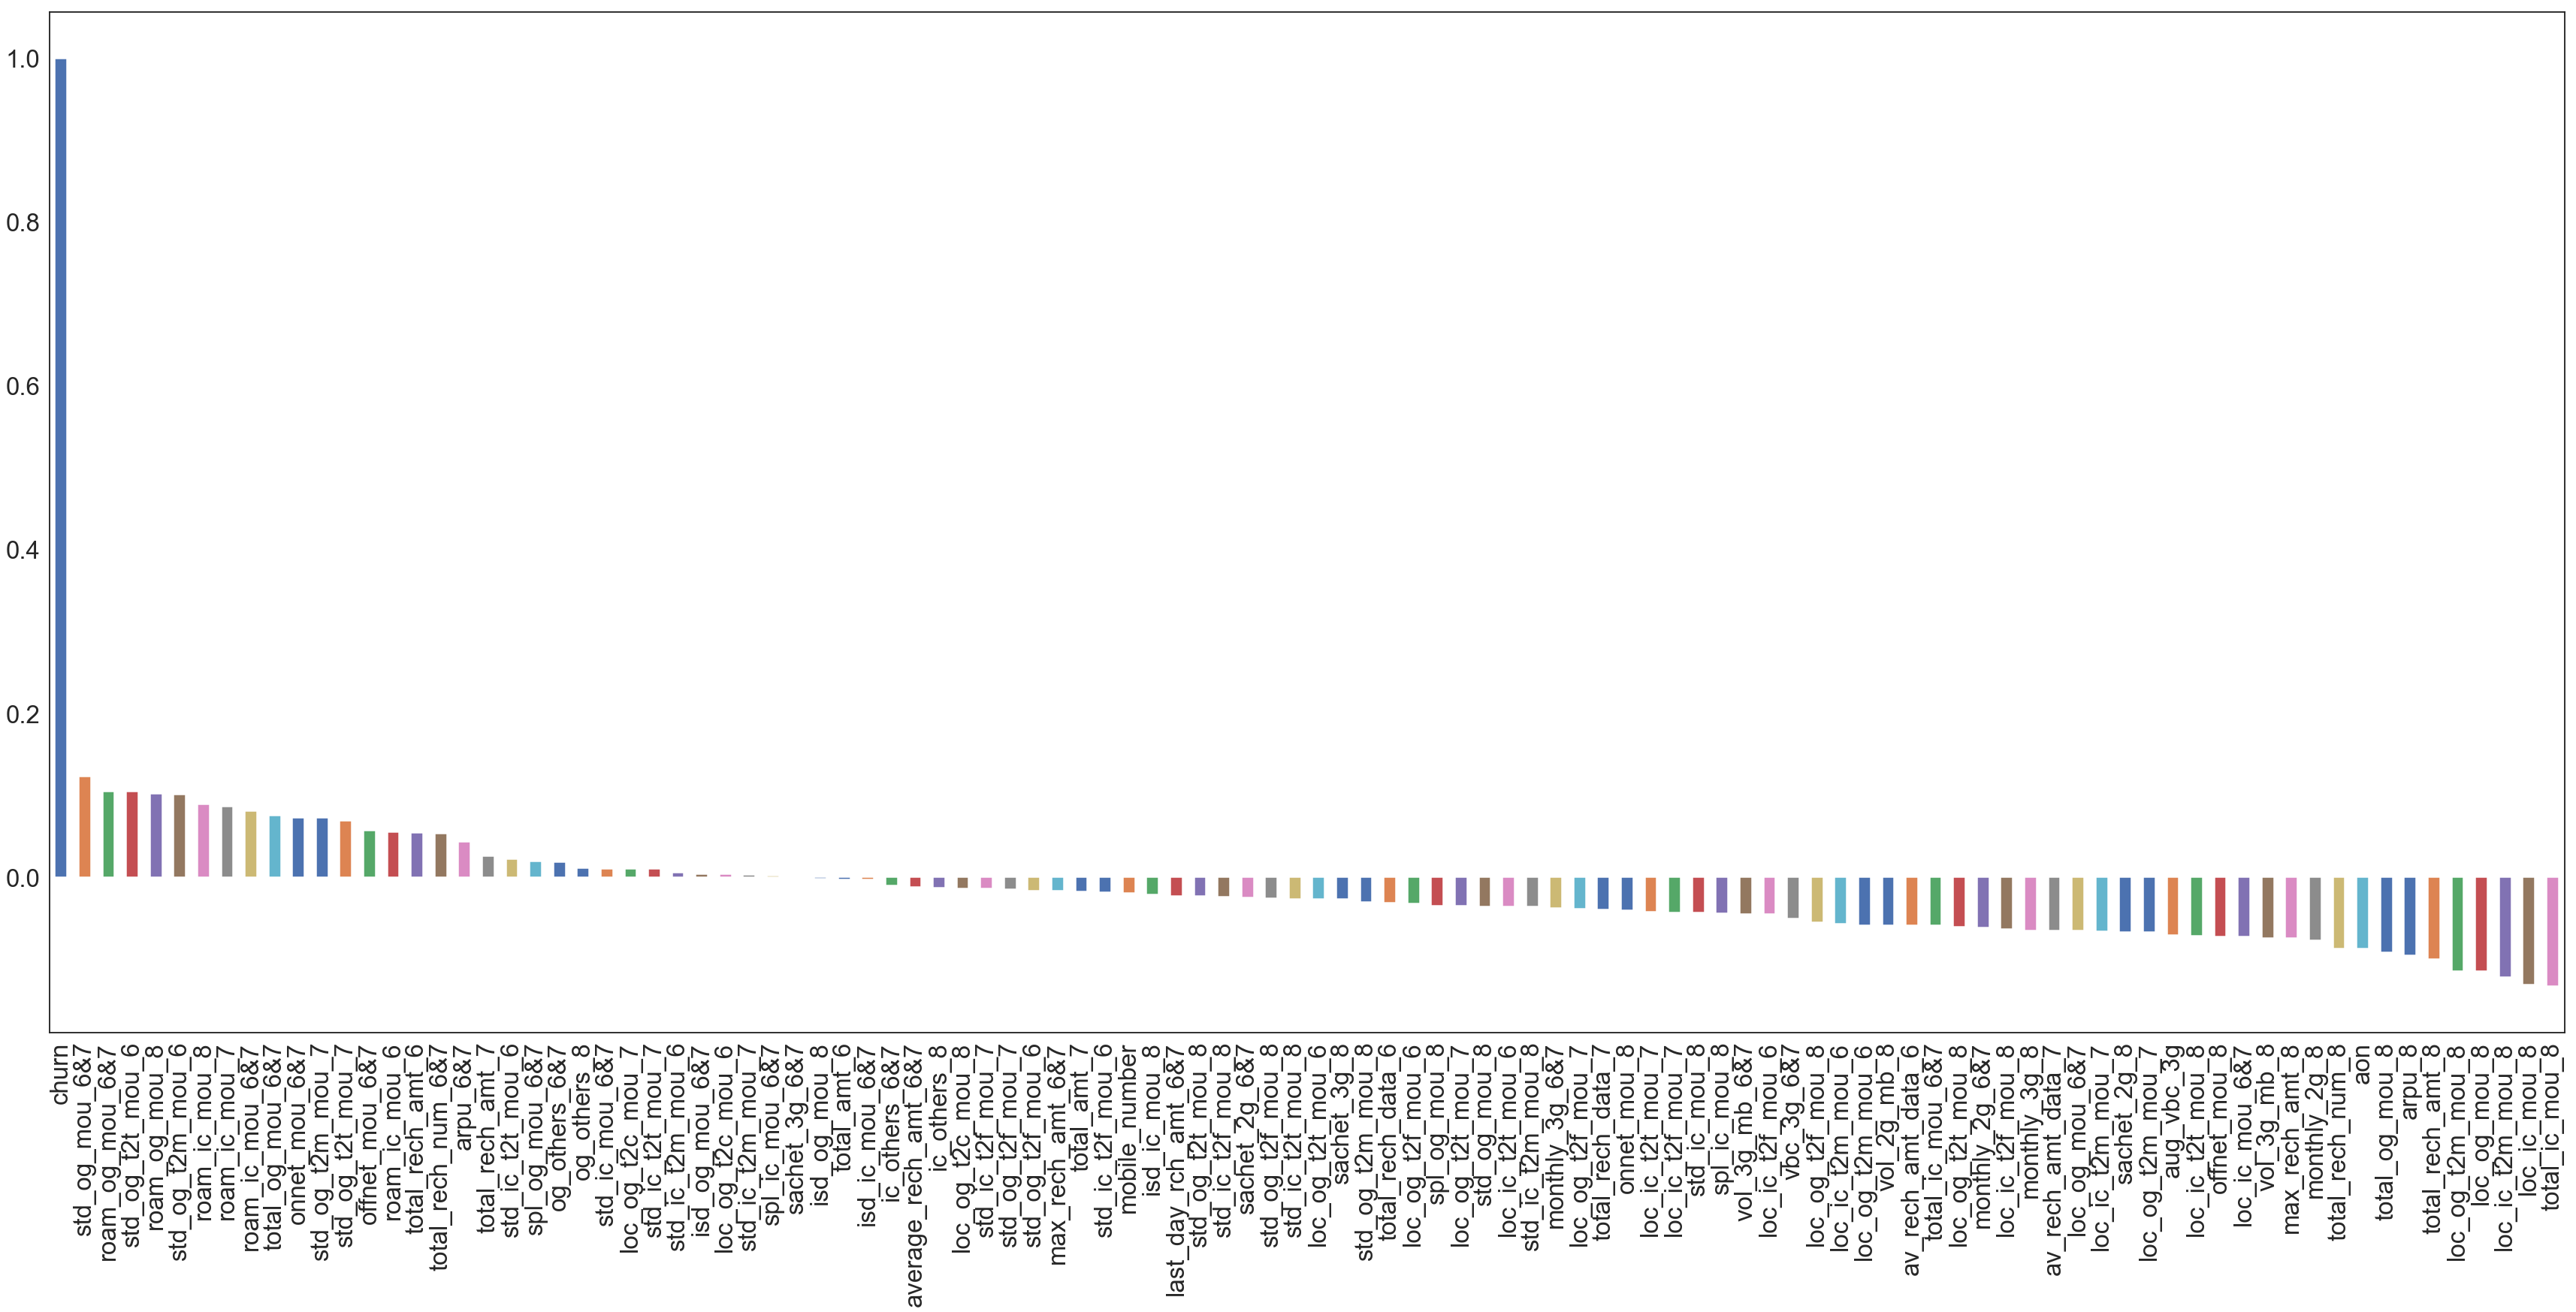

In [52]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(60,25))
sns.set_context("talk", font_scale=2.0)
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')


### Columns std_og_mou_6&7,roam_og_mou_8 and roam_og_mou_6&7 seems to very positively correlated with churn , whereas total_ic_mou_8,loc_ic_mou_8 and loc_ic_t2m_mou_8 etc are negatively correlated.


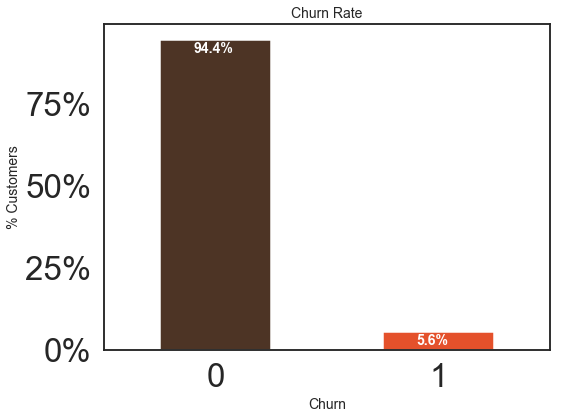

In [53]:
colors = ['#4D3425','#E4512B']
ax = (df['churn'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0, color = colors, figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

#### In our data, 94.4% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.


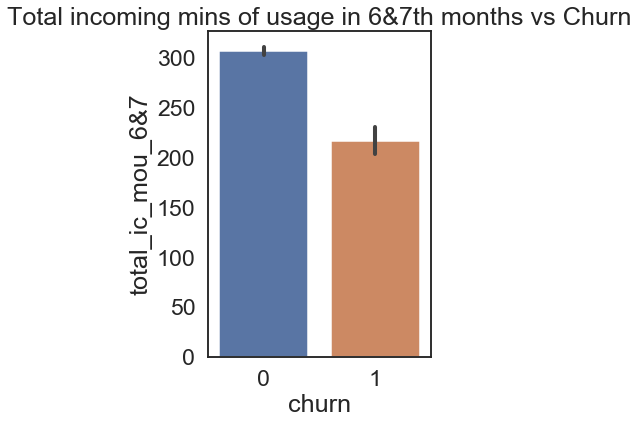

In [396]:
plt.figure(figsize = (4,6))
plt.title("Total incoming mins of usage in 6&7th months vs Churn")
sns.barplot(x="churn", y="total_ic_mou_6&7",  data=df)

#### Clearly we can see the customer whose incoming minutes usage have dropped end up churning

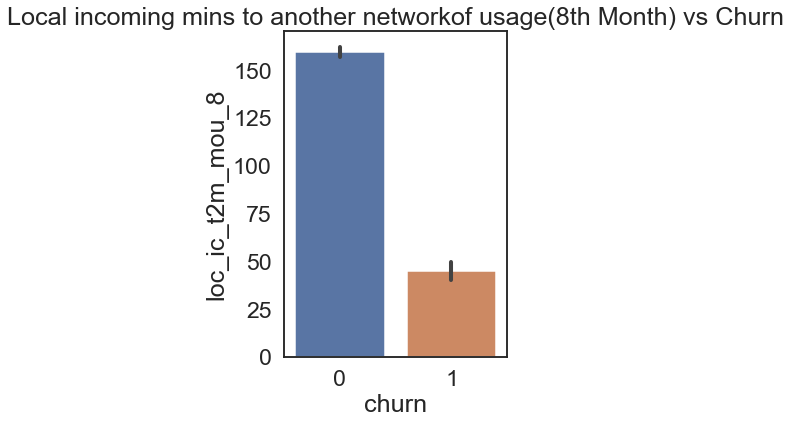

In [397]:
plt.figure(figsize = (4,6))
plt.title("Local incoming mins to another networkof usage(8th Month) vs Churn")
sns.barplot(x="churn", y="loc_ic_t2m_mou_8",  data=df)

#### Again, clearly the customers whose local incoming to another network have gone down end up churning

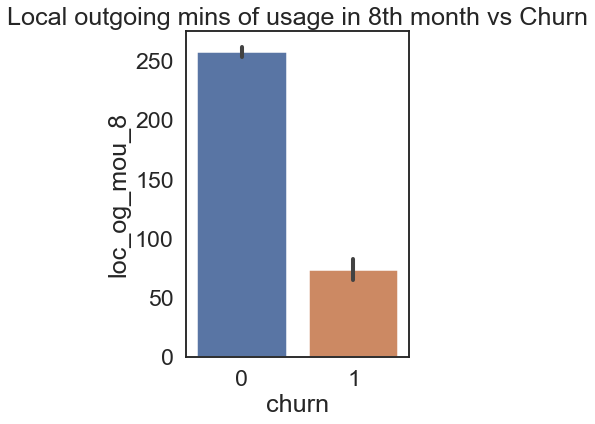

In [400]:
plt.figure(figsize = (4,6))
plt.title("Local outgoing mins of usage in 8th month vs Churn")
sns.barplot(x="churn", y="loc_og_mou_8",  data=df)

#### The customer whose local outgiong has dropped in the 8th month end up churning

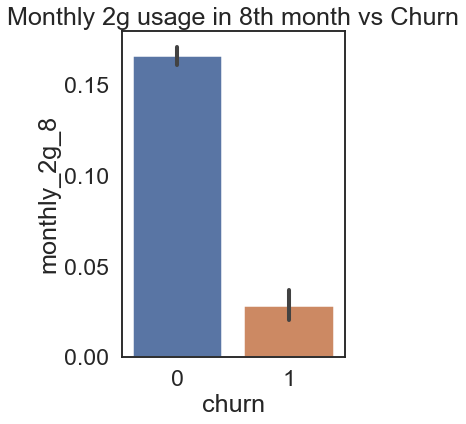

In [401]:
plt.figure(figsize = (4,6))
plt.title("Monthly 2g usage in 8th month vs Churn")
sns.barplot(x="churn", y="monthly_2g_8",  data=df)

#### Customers whose 2g usage has gone down in the 8th month ends up churning

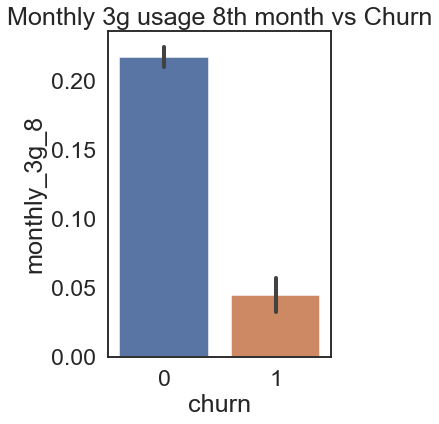

In [402]:
plt.figure(figsize = (4,6))
plt.title("Monthly 3g usage 8th month vs Churn")
sns.barplot(x="churn", y="monthly_3g_8",  data=df)

#### Customers whose 3g usage has gone down in the 8th month ends up churning

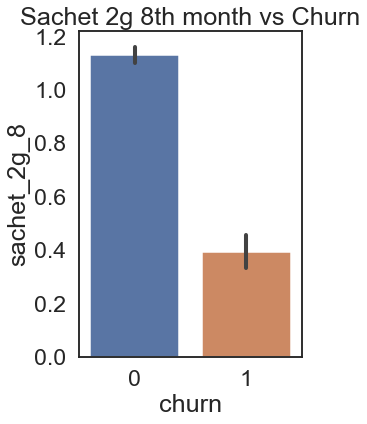

In [405]:
plt.figure(figsize = (4,6))
plt.title("Sachet 2g 8th month vs Churn")
sns.barplot(x="churn", y="sachet_2g_8",  data=df)

#### The customers who have decreased usage of sachets for 2g end up churning

### Feature Standardisation


In [54]:
# standardising all parameters & dropping the mobile number and churn column

df_without_target = df.drop(['mobile_number','churn'],axis=1) 

from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df_without_target.values)
df_without_target = pd.DataFrame(scaled_features, index=df_without_target.index, columns=df_without_target.columns)
df_without_target.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,total_amt_6,total_amt_7,average_rech_amt_6&7,arpu_6&7,onnet_mou_6&7,offnet_mou_6&7,roam_ic_mou_6&7,roam_og_mou_6&7,loc_og_mou_6&7,std_og_mou_6&7,isd_og_mou_6&7,spl_og_mou_6&7,og_others_6&7,total_og_mou_6&7,loc_ic_mou_6&7,std_ic_mou_6&7,total_ic_mou_6&7,spl_ic_mou_6&7,isd_ic_mou_6&7,ic_others_6&7,total_rech_num_6&7,max_rech_amt_6&7,last_day_rch_amt_6&7,vol_3g_mb_6&7,monthly_2g_6&7,monthly_3g_6&7,sachet_2g_6&7,sachet_3g_6&7,vbc_3g_6&7
7,5.279833,-0.414977,-0.050349,-0.000660,0.267292,0.245508,0.161221,-0.154228,-0.235702,-0.179588,0.560771,1.137794,0.012861,2.462741,2.167123,2.359497,-0.252812,-0.208469,-0.242547,0.022543,-0.405644,-0.367483,-0.354864,-0.321472,-0.367322,-0.277005,0.399147,1.372838,1.340819,-0.394180,0.176043,-0.015862,-0.01784,-0.322358,-0.054963,-0.217138,-0.236829,0.289149,0.290124,-0.148388,2.936900,1.687422,0.550835,-0.148637,0.277349,-0.048003,0.218070,0.620387,0.880951,1.059608,2.551958,1.569162,0.956838,1.039940,0.370164,-0.244598,0.281192,1.058354,-0.357580,1.663410,0.201549,4.961524,8.298044,-0.585719,-0.603007,-0.659878,-0.683957,-0.343805,-0.391647,-0.385109,-0.425299,-0.336583,-0.185448,-0.448141,-0.271194,0.301814,-0.251010,0.021971,1.494406,-0.484410,0.272523,0.154591,-0.058614,0.592237,-0.500931,-0.043020,-0.247112,-0.141908,-0.131601,0.499941,0.940132,0.821155,0.413031,-0.041975,1.006442,-0.804584,6.682006,-0.879873,-0.435207,-0.466820,-0.377612,-0.472930,-0.230796,-0.379100
8,-0.776554,-0.452043,-0.440217,-0.215493,-0.167969,-0.172203,-0.193781,0.904473,0.522628,-0.299009,-0.345920,-0.403054,-0.458372,-0.290453,-0.297796,-0.308920,-0.252812,-0.208469,0.736837,-0.499867,-0.126937,-0.107299,-0.328624,-0.410434,-0.416791,-0.213002,-0.152904,-0.142358,-0.148125,-0.360999,-0.043239,0.164338,-0.01784,-0.576156,-0.263488,-0.348792,-0.402993,-0.443044,-0.649248,-0.633325,-0.339513,-0.332112,-0.341370,-0.700141,-0.191585,-0.180557,-0.198490,-0.073850,-0.257551,-0.270246,-0.142830,-0.145610,-0.131718,-0.322341,-0.758951,-0.244598,-0.158010,-0.097749,0.393866,-0.411760,-0.122858,-0.793735,-0.781371,-0.585719,0.042857,-0.659878,0.196360,-0.343710,-0.378127,-0.385109,0.745416,-0.336583,-0.185448,-0.953380,-0.358015,-0.430861,-0.150207,-0.336308,-0.302679,0.252020,-0.646634,-0.220052,-0.251332,0.192565,-0.383591,-0.045007,-0.375409,-0.141908,-0.251623,-0.620576,-0.262266,-0.668872,-0.269382,-0.153297,-0.097386,0.927344,-0.313073,-0.660199,0.041201,0.812003,-0.377612,-0.266962,-0.230796,0.881909
21,0.222288,-0.344226,1.302821,-0.215493,-0.167969,-0.172203,-0.193781,-0.356327,-0.338409,-0.252384,-0.302710,-0.332105,-0.229503,-0.257218,-0.297796,-0.229715,-0.252812,-0.208469,-0.242547,-0.319090,-0.173190,-0.124992,-0.231283,1.191040,1.402294,1.718686,-0.152904,-0.142358,-0.148125,1.003416,-0.043239,-0.329884,-0.01784,0.698489,-0.393346,-0.346737,-0.284648,-0.165463,-0.374693,-0

### PCA


In [55]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [56]:
#Performing the PCA on the data
pca.fit(df_without_target)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them - We'll plot original features on the first 2 principal components as axes


In [57]:
pca.components_

array([[ 1.98435469e-01,  1.31173777e-01,  1.81488730e-01, ...,
        -9.70850651e-02, -3.53327603e-02, -9.69037537e-03],
       [ 2.91857851e-02,  1.48823525e-01,  9.60639766e-02, ...,
        -3.02677121e-02, -3.93872058e-02, -1.22659968e-01],
       [ 1.62500098e-01,  1.65608479e-02,  2.92392702e-02, ...,
         9.40268436e-02,  1.35793350e-01,  1.83430241e-01],
       ...,
       [ 0.00000000e+00,  2.80123147e-14,  3.07538002e-14, ...,
         7.90619794e-02,  3.05134699e-02,  5.55111512e-16],
       [ 0.00000000e+00, -2.89915661e-16,  4.62111879e-16, ...,
        -6.37751722e-01, -2.46136235e-01, -1.31838984e-16],
       [-0.00000000e+00,  3.05094491e-15,  1.98256536e-15, ...,
         3.06120172e-01,  1.18145140e-01, -1.11022302e-16]])

In [60]:
colnames = list(df_without_target.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.198435,0.029186,arpu_8
1,0.131174,0.148824,onnet_mou_8
2,0.181489,0.096064,offnet_mou_8
3,0.028225,0.013913,roam_ic_mou_6
4,0.017975,0.008972,roam_ic_mou_7
5,0.021173,0.010954,roam_ic_mou_8
6,0.030149,0.034030,roam_og_mou_8
7,0.109578,-0.048762,loc_og_t2t_mou_6
8,0.116228,-0.041005,loc_og_t2t_mou_7
9,0.120229,-0.041863,loc_og_t2t_mou_8


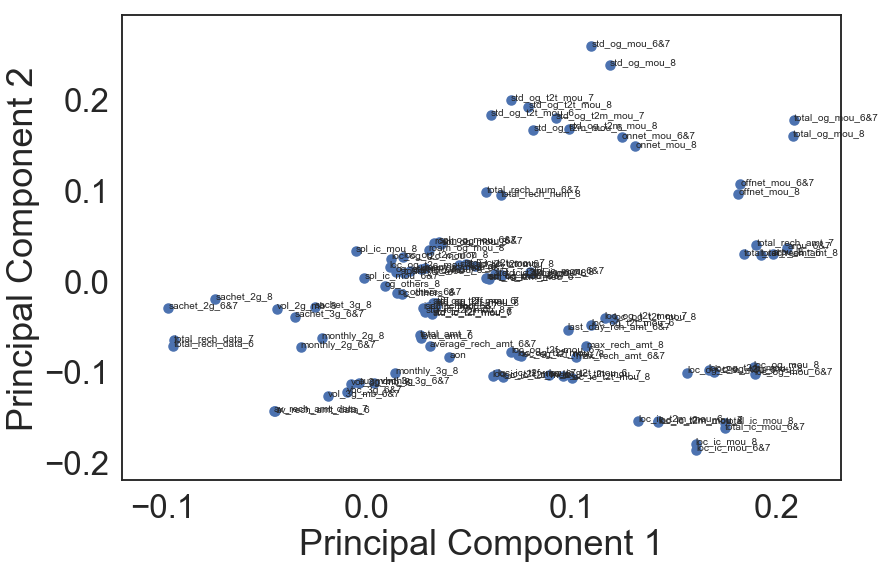

In [61]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [62]:
pca.explained_variance_ratio_

array([1.11553209e-01, 8.83545947e-02, 6.91738900e-02, 4.93506930e-02,
       4.61628323e-02, 3.76732668e-02, 3.51547030e-02, 3.15802657e-02,
       2.95160598e-02, 2.78102956e-02, 2.56428661e-02, 2.35813887e-02,
       2.30040720e-02, 1.91921729e-02, 1.89334537e-02, 1.75735918e-02,
       1.70838823e-02, 1.63537023e-02, 1.53191113e-02, 1.47765862e-02,
       1.36747528e-02, 1.33258892e-02, 1.20572231e-02, 1.12014028e-02,
       1.08746476e-02, 1.06291471e-02, 9.64861452e-03, 9.03801580e-03,
       8.68123750e-03, 8.28900112e-03, 8.08902630e-03, 7.97994947e-03,
       7.77115589e-03, 7.33160275e-03, 6.90064123e-03, 6.41515699e-03,
       6.05657118e-03, 5.89851289e-03, 5.86109277e-03, 5.37806490e-03,
       5.17828501e-03, 5.01224428e-03, 4.47551821e-03, 4.33675092e-03,
       4.10902089e-03, 3.92252930e-03, 3.77683971e-03, 3.73045903e-03,
       3.61470028e-03, 3.34489219e-03, 3.25627435e-03, 3.19733259e-03,
       3.11736526e-03, 3.05925604e-03, 3.01333950e-03, 2.88911553e-03,
      

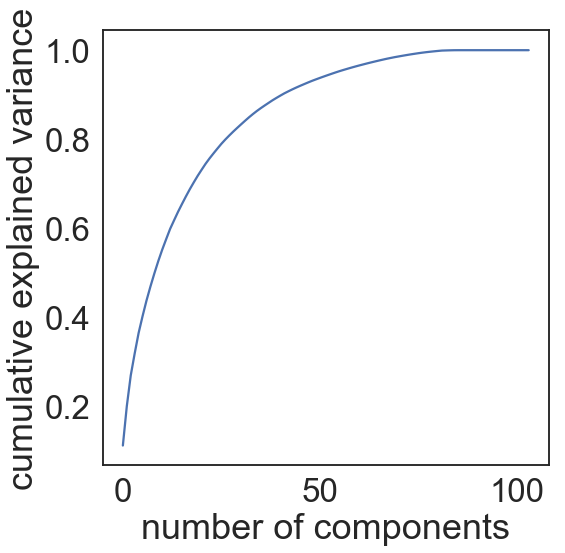

In [68]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
sns.set_context(font_scale = 0.5)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 25 components are enough to describe 80% of the variance in the dataset

In [69]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)

In [70]:
# Basis transformation - getting the data onto our PCs

In [71]:
df_train_pca = pca_final.fit_transform(df_without_target)
df_train_pca.shape

(28460, 25)

In [72]:
# Creating correlation matrix for the principal components - we expect little to no correlation

In [73]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

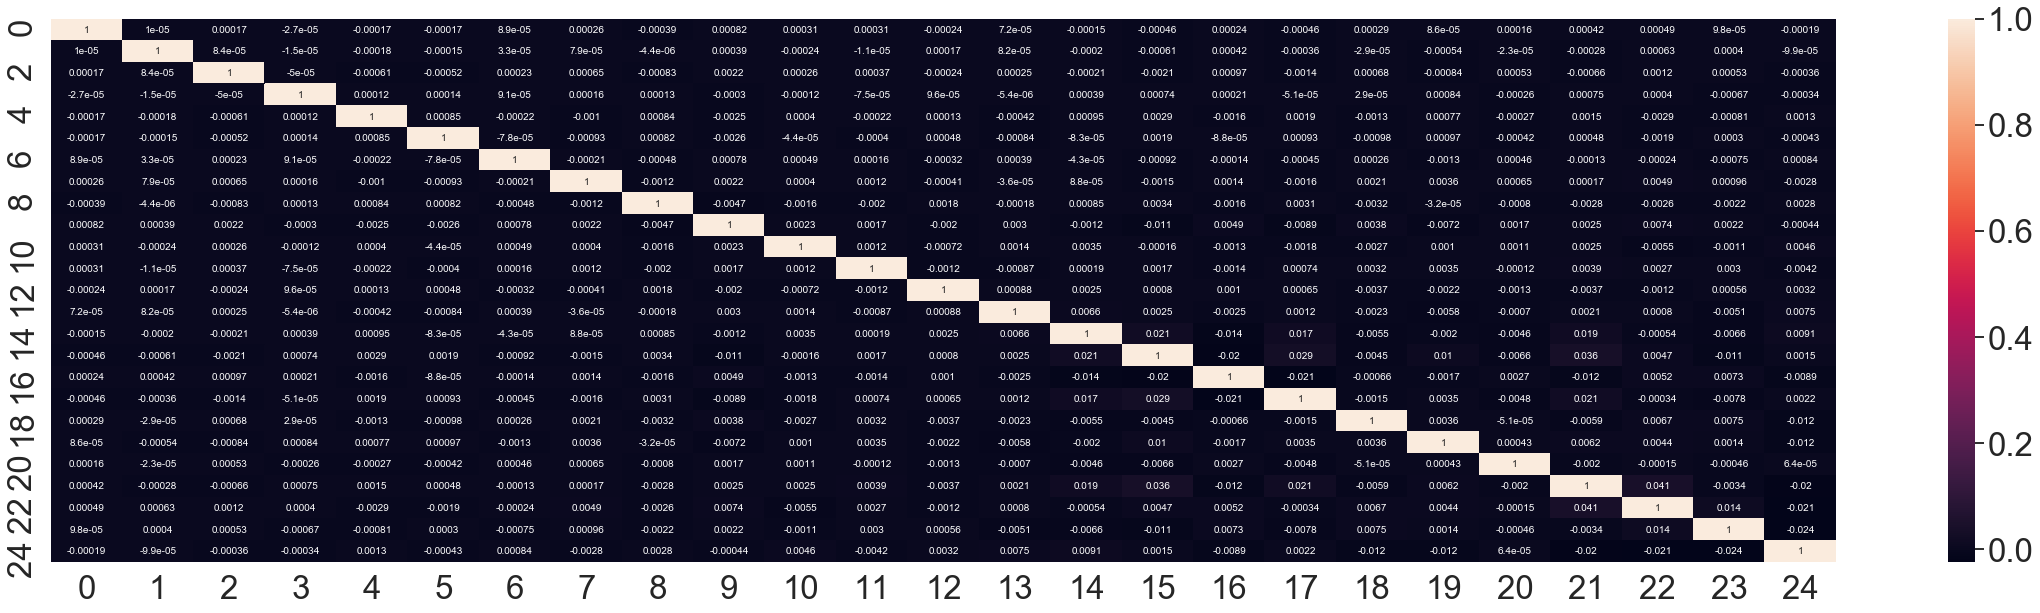

In [74]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (40,10))
sns.heatmap(corrmat,annot = True)

In [76]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.04117685874264308 , min corr:  -0.02426366498211133


#### As expected from PCA - there is very minute correlation between any two components! Good job, PCA!

In [77]:
pca_again = PCA(0.78)
df_train_pca2 = pca_again.fit_transform(df_without_target)
df_train_pca2.shape

(28460, 26)

In [78]:
pca_df = pd.DataFrame(df_train_pca)
pca_df.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25']
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,6.015646,-2.819118,1.583937,4.606204,-4.240719,-1.110920,-1.134853,4.697515,-1.930145,1.042883,-0.825457,0.530103,-1.727464,1.278907,-0.445710,-0.559780,-1.376635,-0.996911,-2.629932,-0.111889,0.067115,1.308383,1.440693,-1.570217,-1.786057
1,-2.462676,0.802781,-0.641820,-0.828561,-0.077845,0.589433,0.041741,0.120105,0.830327,0.583624,0.111747,0.512303,-0.045437,-0.108683,0.438252,-0.212421,0.321204,-0.151556,1.111491,0.348567,-0.037920,0.062904,0.114131,0.065506,0.015042
2,0.545538,3.344138,-0.604707,0.260959,0.663969,-2.443570,-0.389041,-1.184934,0.588657,-0.135761,0.275356,-0.566055,-0.495886,0.368194,0.496599,0.165163,-0.172525,-1.000492,1.133118,0.314084,0.313220,-0.157224,-0.039762,-0.467244,0.100775
3,-2.213568,-0.895154,-0.327595,0.344334,-0.441736,0.444862,-0.521871,-1.042758,0.385452,-0.011833,0.253915,1.147367,0.669753,-0.113583,0.192617,0.902442,-1.134334,-1.488214,-0.485661,-0.410333,0.313428,0.465845,0.546368,0.021016,1.587956
4,-1.789194,-8.135109,20.551467,-1.091410,-0.793397,2.649374,-3.134084,-3.071974,1.360387,-2.404607,0.156549,-1.732559,0.172754,-3.566504,0.393753,0.510731,-0.115065,0.190781,-0.957832,-0.034363,-1.084532,0.998595,0.083112,3.513932,6.348886


In [79]:
# adding mobile number to the Principal components
final_df=df[['churn']].merge(pca_df, how='inner', left_index=True, right_index=True) 
final_df.head()

,churn,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
7,1,3.965714,0.337786,-1.675440,-1.487026,-0.145462,2.118464,-0.262524,0.032773,-0.860598,1.178052,0.064317,-1.419881,1.100896,-4.503111,0.383878,-1.294199,1.331514,3.041732,0.075140,0.362340,-0.256756,-0.022934,0.444140,-0.006059,-0.362636
8,0,2.181530,-1.668722,0.553245,-0.747750,2.163107,-1.196919,1.665313,0.398431,-2.208183,4.372789,2.528215,0.638438,-1.476046,-1.325889,-0.387607,-1.553521,0.215046,-1.060612,1.161244,0.422548,-0.652644,0.561259,-0.140948,-0.098810,-0.406524
21,0,-1.330596,0.694221,-0.692701,0.633949,-0.489618,-1.308888,-0.551786,-0.543454,0.207237,0.097762,0.203418,0.357955,-0.768915,0.991487,-0.478738,0.457658,0.236944,0.267086,-0.764618,0.115619,-0.062627,-0.424390,0.811450,1.793944,-0.621879
23,0,-4.395430,-0.140742,-0.087650,-0.254054,0.908893,-0.222872,0.213143,0.412317,0.196951,0.331885,0.003083,-0.196015,-0.232296,-0.359649,0.464963,0.746877,-0.731040,-0.300997,-0.427802,-0.383126,2.478154,0.032584,0.457642,-0.258903,-0.424591
33,0,13.332222,2.304564,2.498706,17.599493,-1.301403,-3.660466,-8.906676,23.243067,8.224310,-10.326035,19.416452,-4.320525,4.660166,-3.284404,-10.431151,3.395523,1.089856,3.899180,6.957327,-12.872800,-0.949075,1.778998,1.754694,-0.192119,-1.085650


### Logistic Regression on Principle components



In [274]:
# We will use the final_df dataframe
y = final_df['churn'].values
X = final_df.drop(columns = ['churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [275]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [276]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [277]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.9363711001642037


In [284]:
# Getting confusion matrix
confusion = confusion_matrix(y_test,prediction_test)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(confusion)

[[2281    0]
 [ 155    0]]


In [279]:
# sensitivity
TP / float(TP+FN)

0.0

In [280]:
# specificity
TN / float(TN+FP)

1.0

In [281]:
# false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0


In [282]:
# positive predictive value 
print (TP / float(TP+FP))

nan


In [283]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9363711001642037


### Negative predictive value must be as high as possible because this would tell that how much percent of the customer predicted as non-churn are actually not churning. In other words, this algorithm is giving us approx. 7% customers as non-churn but who have actually churned

AxesSubplot(0.125,0.125;0.775x0.755)


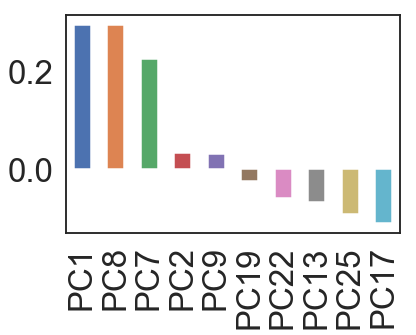

In [285]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

### Above is the plot of each principle component corresponding to the repective weights

AxesSubplot(0.125,0.125;0.775x0.755)


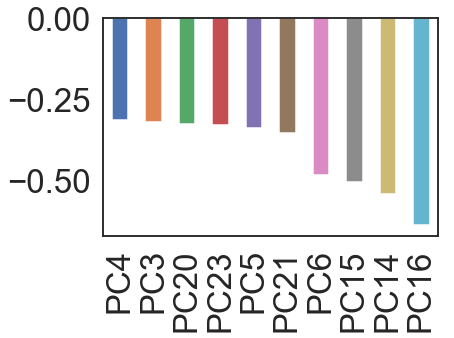

In [286]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

### Above is the plot of each principle component corresponding to the repective weights sorted in descending order of weights

### Logistic regression with managing class imbalance 


In [288]:
# We will use the data frame where we had created dummy variables
y = final_df['churn'].values
X = final_df.drop(columns = ['churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [289]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [290]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, class_weight='balanced')
result = model.fit(X_train, y_train)

In [292]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.5545977011494253


In [293]:
# Getting confusion matrix
confusion = confusion_matrix(y_test,prediction_test)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(confusion)

[[1284  997]
 [  88   67]]


In [294]:
# sensitivity
TP / float(TP+FN)

0.432258064516129

In [295]:
# specificity
TN / float(TN+FP)

0.5629110039456379

In [296]:
# false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.43708899605436213


In [297]:
# positive predictive value 
print (TP / float(TP+FP))

0.06296992481203008


In [298]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9358600583090378


### Negative predictive value must be as high as possible because this would tell that how much percent of the customer predicted as non-churn are actually not churning. In other words, this algorithm is giving us approx. 7% customers as non-churn but who have actually churned

### Random Forest


In [299]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [300]:
# Putting feature variable to X
X = final_df.drop('churn',axis=1)

# Putting response variable to y
y = final_df['churn']

In [301]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
5991,-3.851633,-0.364801,1.368765,-2.611902,3.756871,-1.780949,1.477765,2.345309,-0.102746,0.286744,-0.606419,-0.038201,-0.240379,1.178268,-0.596463,-0.005955,-0.270855,-0.589485,-0.137639,0.045041,-2.405677,-0.020059,-0.100824,-0.003820,-1.144312
19726,0.910363,-5.859629,7.223795,0.086654,-1.870734,1.868621,-2.398145,-3.352380,0.351503,-1.811818,-0.027017,-0.238847,0.977494,-0.314308,0.822942,0.782183,-1.148092,-2.681277,0.972822,-0.030609,-1.726579,-0.006950,-0.382656,-1.316553,0.902267
2483,2.625831,-3.486359,-3.876748,-1.438778,3.036436,-2.248548,0.937624,-1.810333,-2.797103,0.128335,0.498446,-1.341116,4.418610,-0.658267,0.685632,-0.232200,-0.793241,0.038497,2.683684,0.725097,-0.234125,-1.881983,3.545422,-0.427538,0.040118
23087,-2.307341,0.275708,-0.601404,-1.038808,2.056301,-1.452927,0.622052,0.418058,-0.163742,0.452229,0.050438,0.179586,-0.075797,0.262903,0.165741,0.127612,-0.178127,-1.200449,0.826501,0.188823,-1.057289,-0.063040,1.674851,3.279386,-0.625995
13285,4.012449,-1.359595,-2.370326,-4.063339,0.035948,1.672170,1.063530,0.649367,3.843401,1.573752,-0.058617,0.204324,0.025884,-1.386695,0.970896,-0.826025,1.100191,1.156351,0.688725,-0.149238,-0.527333,-0.120301,0.898839,0.549460,0.759051


In [302]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [303]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [304]:
# Making predictions
predictions = rfc.predict(X_test)

In [305]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [306]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      2300
          1       0.00      0.00      0.00       136

avg / total       0.89      0.94      0.92      2436



In [308]:
# Getting confusion matrix
confusion = confusion_matrix(y_test,predictions)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(confusion)

[[2299    1]
 [ 136    0]]


In [309]:
# sensitivity
TP / float(TP+FN)

0.0

In [310]:
# specificity
TN / float(TN+FP)

0.9995652173913043

In [311]:
# false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0004347826086956522


In [312]:
# positive predictive value 
print (TP / float(TP+FP))

0.0


In [313]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9441478439425052


### Negative predictive value must be as high as possible because this would tell that how much percent of the customer predicted as non-churn are actually not churning. In other words, this algorithm is giving us approx. 6% customers as non-churn but who have actually churned

#### So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

## Grid Search to Find Optimal Hyperparameters

In [100]:
# Create the parameter grid based on the results of random search 
# GridSearchCV to find optimal solution
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [101]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [103]:
# printing the optimal accuracy score and hyperparameters
print('We get an accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We get an accuracy of 0.9417663617171006 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [336]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

In [337]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [338]:
# predict
predictions = rfc.predict(X_test)

In [339]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [340]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      2300
          1       0.00      0.00      0.00       136

avg / total       0.89      0.94      0.92      2436



In [341]:
# Getting confusion matrix
confusion = confusion_matrix(y_test,predictions)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(confusion)

[[2300    0]
 [ 136    0]]


In [342]:
# sensitivity
TP / float(TP+FN)

0.0

In [343]:
# specificity
TN / float(TN+FP)

1.0

In [344]:
# false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0


In [345]:
# positive predictive value 
print (TP / float(TP+FP))

nan


In [346]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9441707717569786


### Random forest with managing class imbalance


In [111]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [112]:
# Putting feature variable to X
X = final_df.drop('churn',axis=1)

# Putting response variable to y
y = final_df['churn']

In [113]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
5991,-3.851633,-0.364801,1.368765,-2.611902,3.756871,-1.780949,1.477765,2.345309,-0.102746,0.286744,-0.606419,-0.038201,-0.240379,1.178268,-0.596463,-0.005955,-0.270855,-0.589485,-0.137639,0.045041,-2.405677,-0.020059,-0.100824,-0.003820,-1.144312
19726,0.910363,-5.859629,7.223795,0.086654,-1.870734,1.868621,-2.398145,-3.352380,0.351503,-1.811818,-0.027017,-0.238847,0.977494,-0.314308,0.822942,0.782183,-1.148092,-2.681277,0.972822,-0.030609,-1.726579,-0.006950,-0.382656,-1.316553,0.902267
2483,2.625831,-3.486359,-3.876748,-1.438778,3.036436,-2.248548,0.937624,-1.810333,-2.797103,0.128335,0.498446,-1.341116,4.418610,-0.658267,0.685632,-0.232200,-0.793241,0.038497,2.683684,0.725097,-0.234125,-1.881983,3.545422,-0.427538,0.040118
23087,-2.307341,0.275708,-0.601404,-1.038808,2.056301,-1.452927,0.622052,0.418058,-0.163742,0.452229,0.050438,0.179586,-0.075797,0.262903,0.165741,0.127612,-0.178127,-1.200449,0.826501,0.188823,-1.057289,-0.063040,1.674851,3.279386,-0.625995
13285,4.012449,-1.359595,-2.370326,-4.063339,0.035948,1.672170,1.063530,0.649367,3.843401,1.573752,-0.058617,0.204324,0.025884,-1.386695,0.970896,-0.826025,1.100191,1.156351,0.688725,-0.149238,-0.527333,-0.120301,0.898839,0.549460,0.759051


In [114]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})

In [115]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [116]:
# Making predictions
predictions = rfc.predict(X_test)

In [117]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [118]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      2300
          1       0.00      0.00      0.00       136

avg / total       0.89      0.94      0.92      2436



In [319]:
# Getting confusion matrix
confusion = confusion_matrix(y_test,predictions)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(confusion)

[[2300    0]
 [ 136    0]]


In [320]:
# sensitivity
TP / float(TP+FN)

0.0

In [321]:
# specificity
TN / float(TN+FP)

1.0

In [322]:
# false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0


In [323]:
# positive predictive value 
print (TP / float(TP+FP))

nan


In [324]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9441707717569786


### Negative predictive value must be as high as possible because this would tell that how much percent of the customer predicted as non-churn are actually not churning. In other words, this algorithm is giving us approx. 6% customers as non-churn but who have actually churned

### Even after handling the class imbalance explicitly the model shows same performance as the with explicit handling class imbalance

### Grid Search to Find Optimal Hyperparameters


In [122]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [123]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [124]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9417663617171006 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [325]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

In [326]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [327]:
# predict
predictions = rfc.predict(X_test)

In [328]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [329]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      2300
          1       0.00      0.00      0.00       136

avg / total       0.89      0.94      0.92      2436



In [330]:
# Getting confusion matrix
confusion = confusion_matrix(y_test,predictions)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(confusion)

[[2300    0]
 [ 136    0]]


In [331]:
# sensitivity
TP / float(TP+FN)

0.0

In [332]:
# specificity
TN / float(TN+FP)

1.0

In [333]:
# false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0


In [334]:
# positive predictive value 
print (TP / float(TP+FP))

nan


In [335]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9441707717569786


### Even after tuning the results remain the same as per the previous model

**Important Features**


In [254]:
from sklearn.model_selection import train_test_split
# We specify random_state so that the train and test data set always have the same rows for every run

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [138]:
y_train = df_train.pop('churn')
X_train = df_train

In [139]:
df_train_id = X_train
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X_train.values)
X_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)
X_train.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,total_amt_6,total_amt_7,average_rech_amt_6&7,arpu_6&7,onnet_mou_6&7,offnet_mou_6&7,roam_ic_mou_6&7,roam_og_mou_6&7,loc_og_mou_6&7,std_og_mou_6&7,isd_og_mou_6&7,spl_og_mou_6&7,og_others_6&7,total_og_mou_6&7,loc_ic_mou_6&7,std_ic_mou_6&7,total_ic_mou_6&7,spl_ic_mou_6&7,isd_ic_mou_6&7,ic_others_6&7,total_rech_num_6&7,max_rech_amt_6&7,last_day_rch_amt_6&7,vol_3g_mb_6&7,monthly_2g_6&7,monthly_3g_6&7,sachet_2g_6&7,sachet_3g_6&7,vbc_3g_6&7
74272,0.891864,0.072172,0.051028,0.147440,0.000000,0.000000,0.0,0.000000,0.052712,0.020956,0.051028,0.143064,0.064429,0.221656,0.000450,0.000000,0.0,0.0,0.000000,0.000000,0.149312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000406,0.000024,0.0,0.005206,0.0,0.149609,0.020598,0.008388,0.016309,0.243784,0.079645,0.095037,0.000000,0.000000,0.000000,0.089934,0.000000,0.000000,0.000000,0.000929,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.079886,0.000000,0.0,0.000008,0.086735,0.028417,0.013388,0.040468,0.034615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.0000,0.0,0.501570,0.000000,0.008814,0.009630,0.004798,0.044194,0.033699,0.062940,0.000000,0.000000,0.105659,0.000000,0.000000,0.000000,0.007117,0.093658,0.126228,0.000403,0.109480,0.000903,0.0,0.000000,0.118852,0.027419,0.012903,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
24114,0.747428,0.037435,0.003216,0.018698,0.000000,0.000000,0.0,0.000000,0.000994,0.006967,0.003216,0.017737,0.032033,0.028115,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.015768,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.015758,0.001203,0.007354,0.008421,0.016038,0.038010,0.027380,0.000328,0.000000,0.004086,0.029883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.026601,0.269841,0.0,0.000000,0.061224,0.009236,0.005454,0.008848,0.034615,0.081967,0.000000,0.030215,0.000000,0.001760,0.026865,0.2,0.022727,0.0000,0.0,0.232311,0.000000,0.012912,0.003923,0.005991,0.031109,0.004000,0.015862,0.000000,0.000000,0.021166,0.000048,0.000000,0.004667,0.000000,0.019110,0.021660,0.000000,0.018751,0.006020,0.0,0.000000,0.090164,0.029677,0.028548,0.004674,0.111111,0.0,0.039474,0.018868,0.000000
95239,0.347247,0.037963,0.025758,0.016978,0.000000,0.000997,0.0,0.004921,0.045011,0.029253,0.005307,0.012626,0.005580,0.014544,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.011706,0.063881,0.037319,0.028292,0.002100,0.000000,0.006845,0.000000,0.0,0.000000,0.029928,0.0,0.000510,0.0,0.035018,0.003075,0.003675,0.003455,0.010850,0.015721,0.015935,0.000524,0.000000,0.000000,0.015614,0.004479,0.001181,0.003415,0.002266,0.001251,0.001755,0.0,0.00000,0.000000,0.003628,0.017433,0.000000,0.0,0.000000,0.153061,0.018670,0.009917,0.008098,0.015060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.068182,0.0000,0.

In [144]:
# trating imbalanced dataset
from kmeans_smote import KMeansSMOTE
[print('Class {} has {} instances'.format(label, count))
 for label, count in zip(*np.unique(y_train, return_counts=True))]
kmeans_smote = KMeansSMOTE(
    kmeans_args={
        'n_clusters': 100
    },
    smote_args={
        'k_neighbors': 10
    }
)
X_resampled, y_resampled = kmeans_smote.fit_sample(X_train, y_train)

[print('Class {} has {} instances after oversampling'.format(label, count))
 for label, count in zip(*np.unique(y_resampled, return_counts=True))]

Class 0 has 18803 instances
Class 1 has 1119 instances
Class 0 has 18803 instances after oversampling
Class 1 has 18803 instances after oversampling


[None, None]

In [145]:
X_train=pd.DataFrame(data=X_resampled,columns=X_train.columns)
X_train.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,total_amt_6,total_amt_7,average_rech_amt_6&7,arpu_6&7,onnet_mou_6&7,offnet_mou_6&7,roam_ic_mou_6&7,roam_og_mou_6&7,loc_og_mou_6&7,std_og_mou_6&7,isd_og_mou_6&7,spl_og_mou_6&7,og_others_6&7,total_og_mou_6&7,loc_ic_mou_6&7,std_ic_mou_6&7,total_ic_mou_6&7,spl_ic_mou_6&7,isd_ic_mou_6&7,ic_others_6&7,total_rech_num_6&7,max_rech_amt_6&7,last_day_rch_amt_6&7,vol_3g_mb_6&7,monthly_2g_6&7,monthly_3g_6&7,sachet_2g_6&7,sachet_3g_6&7,vbc_3g_6&7
0,0.891864,0.072172,0.051028,0.147440,0.000000,0.000000,0.0,0.000000,0.052712,0.020956,0.051028,0.143064,0.064429,0.221656,0.000450,0.000000,0.0,0.0,0.000000,0.000000,0.149312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000406,0.000024,0.0,0.005206,0.0,0.149609,0.020598,0.008388,0.016309,0.243784,0.079645,0.095037,0.000000,0.000000,0.000000,0.089934,0.000000,0.000000,0.000000,0.000929,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.079886,0.000000,0.0,0.000008,0.086735,0.028417,0.013388,0.040468,0.034615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.0000,0.0,0.501570,0.000000,0.008814,0.009630,0.004798,0.044194,0.033699,0.062940,0.000000,0.000000,0.105659,0.000000,0.000000,0.000000,0.007117,0.093658,0.126228,0.000403,0.109480,0.000903,0.0,0.000000,0.118852,0.027419,0.012903,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.747428,0.037435,0.003216,0.018698,0.000000,0.000000,0.0,0.000000,0.000994,0.006967,0.003216,0.017737,0.032033,0.028115,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.015768,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.015758,0.001203,0.007354,0.008421,0.016038,0.038010,0.027380,0.000328,0.000000,0.004086,0.029883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.026601,0.269841,0.0,0.000000,0.061224,0.009236,0.005454,0.008848,0.034615,0.081967,0.000000,0.030215,0.000000,0.001760,0.026865,0.2,0.022727,0.0000,0.0,0.232311,0.000000,0.012912,0.003923,0.005991,0.031109,0.004000,0.015862,0.000000,0.000000,0.021166,0.000048,0.000000,0.004667,0.000000,0.019110,0.021660,0.000000,0.018751,0.006020,0.0,0.000000,0.090164,0.029677,0.028548,0.004674,0.111111,0.0,0.039474,0.018868,0.000000
2,0.347247,0.037963,0.025758,0.016978,0.000000,0.000997,0.0,0.004921,0.045011,0.029253,0.005307,0.012626,0.005580,0.014544,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.011706,0.063881,0.037319,0.028292,0.002100,0.000000,0.006845,0.000000,0.0,0.000000,0.029928,0.0,0.000510,0.0,0.035018,0.003075,0.003675,0.003455,0.010850,0.015721,0.015935,0.000524,0.000000,0.000000,0.015614,0.004479,0.001181,0.003415,0.002266,0.001251,0.001755,0.0,0.00000,0.000000,0.003628,0.017433,0.000000,0.0,0.000000,0.153061,0.018670,0.009917,0.008098,0.015060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.068182,0.0000,0.0,0.120985,0

**Model Building**

In [146]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_resampled,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37606
Model:                            GLM   Df Residuals:                    37503
Model Family:                Binomial   Df Model:                          102
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14718.
Date:                Mon, 13 May 2019   Deviance:                       29437.
Time:                        21:52:04   Pearson chi2:                 1.72e+05
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9959      0.257     -3.873      0.000      -1.500      -0.492
mobile_number            0.1312      0.053      2.477      0.013       0.027       0.235
arpu_8                  54.4977      6.467      8.428      0.000      41.823      67.172
onnet_mou_8             35.8072     33.435      1.071      0.284     -29.725     101.339
offnet_mou_8            10.9869     22.769      0.483      0.629     -33.639      55.613
roam_ic_mou_6           -0.5245      0.758     -0.692      0.489      -2.009       0.960
roam_ic_mou_7            4.5852      0.971      4.720      0.000       2.681       6.489
roam_ic_mou_8           -5.5298      1.169     -4.728      0.000      -7.822      -3.238
roam_og_mou_8           -3.8326     10.766     -0.356      0.722     -24.933      17.268
loc_og_t2t_mou_6      3.866e+04   1.23e+04      3.134      0.002    1.45e+04    6.28e+04
loc_og_t2t_mou_7       4.45e+04   1.42e+04      3.134      0.002    1.67e+04    7.23e+04
loc_og_t2t_mou_8      2.044e+05   3.27e+04      6.242      0.000     1.4e+05    2.69e+05
loc_og_t2m_mou_6      2.531e+04   8080.022      3.133      0.002    9477.084    4.12e+04
loc_og_t2m_mou_7       2.74e+04   8742.028      3.134      0.002    1.03e+04    4.45e+04
loc_og_t2m_mou_8      9.432e+04   1.51e+04      6.244      0.000    6.47e+04    1.24e+05
loc_og_t2f_mou_6      8816.7001   2812.537      3.135      0.002    3304.229    1.43e+04
loc_og_t2f_mou_7      7171.8645   2295.321      3.125      0.002    2673.117    1.17e+04
loc_og_t2f_mou_8      1.766e+04   2827.241      6.246      0.000    1.21e+04    2.32e+04
loc_og_t2c_mou_6        -6.8836      1.000     -6.882      0.000      -8.844      -4.923
loc_og_t2c_mou_7        -4.6614      1.651     -2.824      0.005      -7.897      -1.426
loc_og_t2c_mou_8         7.9523      1.371      5.800      0.000       5.265      10.639
loc_og_mou_8          -6.86e+04   4.44e+04     -1.546      0.122   -1.56e+05    1.84e+04
std_og_t2t_mou_6     -1.283e+05   1.66e+04     -7.751      0.000   -1.61e+05   -9.59e+04
std_og_t2t_mou_7     -1.494e+05   1.93e+04     -7.751      0.000   -1.87e+05   -1.12e+05
std_og_t2t_mou_8      6.266e+04    2.9e+04      2.158      0.031    5762.501     1.2e+05
std_og_t2m_mou_6     -1.527e+05   1.97e+04     -7.751      0.000   -1.91e+05   -1.14e+05
std_og_t2m_mou_7     -1.519e+05   1.96e+04     -7.751      0.000    -1.9e+05   -1.14e+05
std_og_t2m_mou_8      5.688e+04   2.63e+04      2.159      0.031    5240.503    1.09e+05
std_og_t2f_mou_6     -6205.8323    801.016     -7.747      0.000   -7775.795   -4635.870
std_og_t2f_mou_7     -1.001e+04   1290.692     -7.754      0.000   -1.25e+04   -7478.549
std_og_t2f_mou_8      4336.3598   2013.305      2.154      0.031     390.354    8282.365
std_og_mou_8          3.773e+04      4e+04      0.942      0.346   -4.07e+04    1.16e+05
isd_og_mou_8          7.268e+04   1.62e+04     

In [147]:
## Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10) # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_resampled)

In [148]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [152]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('mobile_number', False, 90),
 ('arpu_8', False, 43),
 ('onnet_mou_8', False, 19),
 ('offnet_mou_8', False, 20),
 ('roam_ic_mou_6', False, 69),
 ('roam_ic_mou_7', False, 38),
 ('roam_ic_mou_8', False, 81),
 ('roam_og_mou_8', False, 21),
 ('loc_og_t2t_mou_6', False, 89),
 ('loc_og_t2t_mou_7', False, 75),
 ('loc_og_t2t_mou_8', False, 33),
 ('loc_og_t2m_mou_6', False, 26),
 ('loc_og_t2m_mou_7', False, 27),
 ('loc_og_t2m_mou_8', False, 6),
 ('loc_og_t2f_mou_6', False, 83),
 ('loc_og_t2f_mou_7', False, 44),
 ('loc_og_t2f_mou_8', False, 28),
 ('loc_og_t2c_mou_6', False, 30),
 ('loc_og_t2c_mou_7', False, 85),
 ('loc_og_t2c_mou_8', False, 47),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 59),
 ('std_og_t2t_mou_7', False, 91),
 ('std_og_t2t_mou_8', False, 67),
 ('std_og_t2m_mou_6', False, 76),
 ('std_og_t2m_mou_7', False, 41),
 ('std_og_t2m_mou_8', False, 68),
 ('std_og_t2f_mou_6', False, 96),
 ('std_og_t2f_mou_7', False, 62),
 ('std_og_t2f_mou_8', False, 14),
 ('std_og_mou_8', Fal

In [153]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_i

Assessing the model with StatsModels

In [154]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_resampled,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37606
Model:                            GLM   Df Residuals:                    37595
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16445.
Date:                Mon, 13 May 2019   Deviance:                       32891.
Time:                        21:53:24   Pearson chi2:                 1.52e+05
No. Iterations:                     7   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0289      0.026     39.957      0.000       0.978       1.079
loc_og_mou_8       -16.3908      1.267    -12.933      0.000     -18.875     -13.907
total_og_mou_8     -16.2505      0.486    -33.466      0.000     -17.202     -15.299
loc_ic_t2m_mou_8    -0.1551      1.969     -0.079      0.937      -4.014       3.704
loc_ic_mou_8       -16.7009      2.105     -7.936      0.000     -20.826     -12.576
total_ic_mou_8     -24.0736      1.357    -17.741      0.000     -26.733     -21.414
monthly_2g_8       -10.0508      0.325    -30.937      0.000     -10.688      -9.414
sachet_2g_8        -14.0441      0.436    -32.233      0.000     -14.898     -13.190
monthly_3g_8       -23.4621      0.838    -27.998      0.000     -25.105     -21.820
total_og_mou_6&7     7.8943      0.265     29.814      0.000       7.375       8.413
total_ic_mou_6&7    16.9714      0.842     20.147      0.000      15.320      18.622
====================================================================================
"""

In [155]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.001227
1    0.076587
2    0.392728
3    0.313456
4    0.259343
5    0.002497
6    0.452696
7    0.419148
8    0.920817
9    0.180555
dtype: float64

In [156]:
columns=['churn']
y_train_pred_final = pd.DataFrame(data=y_resampled, columns=columns)
y_train_pred_final['churn_Prob']=y_train_pred
y_train_pred_final.head()

,churn,churn_Prob
0,0,0.001227
1,0,0.076587
2,0,0.392728
3,0,0.313456
4,0,0.259343


In [157]:
y_train_pred_final['Predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,churn,churn_Prob,Predicted
0,0,0.001227,0
1,0,0.076587,0
2,0,0.392728,0
3,0,0.313456,0
4,0,0.259343,0


In [158]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.Predicted )
print(confusion)

[[14565  4238]
 [ 2909 15894]]


In [159]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.Predicted))

0.8099505398074776


**Checking multicolinearity**

In [160]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_mou_8,12.03
4,total_ic_mou_8,10.39
2,loc_ic_t2m_mou_8,5.60
9,total_ic_mou_6&7,4.53
1,total_og_mou_8,3.12
8,total_og_mou_6&7,2.61
0,loc_og_mou_8,2.28
5,monthly_2g_8,1.07
7,monthly_3g_8,1.06
6,sachet_2g_8,1.05


In [161]:
col = col.drop('loc_ic_mou_8', 1)
col

Index(['loc_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'total_og_mou_6&7',
       'total_ic_mou_6&7'],
      dtype='object')

In [163]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_resampled,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37606
Model:                            GLM   Df Residuals:                    37596
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16479.
Date:                Mon, 13 May 2019   Deviance:                       32959.
Time:                        21:55:08   Pearson chi2:                 2.65e+05
No. Iterations:                     7   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0247      0.026     39.879      0.000       0.974       1.075
loc_og_mou_8       -18.8346      1.249    -15.081      0.000     -21.282     -16.387
total_og_mou_8     -16.1476      0.485    -33.295      0.000     -17.098     -15.197
loc_ic_t2m_mou_8   -11.0144      1.316     -8.367      0.000     -13.594      -8.434
total_ic_mou_8     -29.6610      1.246    -23.814      0.000     -32.102     -27.220
monthly_2g_8       -10.1143      0.325    -31.165      0.000     -10.750      -9.478
sachet_2g_8        -14.0769      0.436    -32.294      0.000     -14.931     -13.223
monthly_3g_8       -23.4540      0.836    -28.042      0.000     -25.093     -21.815
total_og_mou_6&7     7.9568      0.265     29.986      0.000       7.437       8.477
total_ic_mou_6&7    16.8239      0.837     20.096      0.000      15.183      18.465
====================================================================================
"""

In [164]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([8.61983218e-04, 7.63758787e-02, 3.83886036e-01, 2.86671579e-01,
       2.61127304e-01, 2.27659265e-03, 4.85803502e-01, 4.15101610e-01,
       9.21318306e-01, 1.72023028e-01])

In [165]:
y_train_pred_final['churn_Prob'] = y_train_pred

In [166]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_Prob,Predicted
0,0,0.000862,0
1,0,0.076376,0
2,0,0.383886,0
3,0,0.286672,0
4,0,0.261127,0


In [167]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.Predicted))

0.8102696378237515


In [168]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_ic_mou_8,6.83
8,total_ic_mou_6&7,4.50
2,loc_ic_t2m_mou_8,3.87
1,total_og_mou_8,3.10
7,total_og_mou_6&7,2.61
0,loc_og_mou_8,2.21
4,monthly_2g_8,1.07
6,monthly_3g_8,1.06
5,sachet_2g_8,1.05


In [212]:
col = col.drop('total_ic_mou_8', 1)
col

Index(['loc_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'total_og_mou_6&7', 'total_ic_mou_6&7'],
      dtype='object')

In [213]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_resampled,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37606
Model:                            GLM   Df Residuals:                    37597
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16876.
Date:                Mon, 13 May 2019   Deviance:                       33752.
Time:                        22:06:22   Pearson chi2:                 1.83e+06
No. Iterations:                     6   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0477      0.025     41.450      0.000       0.998       1.097
loc_og_mou_8       -21.7460      1.258    -17.289      0.000     -24.211     -19.281
total_og_mou_8     -20.5030      0.474    -43.236      0.000     -21.432     -19.574
loc_ic_t2m_mou_8   -28.0811      1.024    -27.436      0.000     -30.087     -26.075
monthly_2g_8       -10.3316      0.319    -32.395      0.000     -10.957      -9.707
sachet_2g_8        -14.2788      0.434    -32.920      0.000     -15.129     -13.429
monthly_3g_8       -24.3329      0.825    -29.485      0.000     -25.950     -22.715
total_og_mou_6&7     9.7400      0.262     37.117      0.000       9.226      10.254
total_ic_mou_6&7     2.1303      0.509      4.189      0.000       1.134       3.127
====================================================================================
"""

In [214]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

y_train_pred_final['churn_Prob'] = y_train_pred

In [215]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000142,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.072297,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.394527,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.292736,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.245002,0,1,1,1,0,0,0,0,0,0,0,0


In [216]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.Predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

0.803169706961655


,Features,VIF
1,total_og_mou_8,2.91
7,total_ic_mou_6&7,2.68
2,loc_ic_t2m_mou_8,2.59
6,total_og_mou_6&7,2.45
0,loc_og_mou_8,2.21
3,monthly_2g_8,1.07
5,monthly_3g_8,1.06
4,sachet_2g_8,1.05


In [217]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [218]:
# sensitivity
TP / float(TP+FN)

0.8452906451098229

In [219]:
# specificity
TN / float(TN+FP)

0.7746104345051321

In [220]:
# false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22538956549486783


In [221]:
# positive predictive value 
print (TP / float(TP+FP))

0.7894893701569641


In [222]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8335240929380794


### Negative predictive value must be as high as possible because this would tell that how much percent of the customer predicted as non-churn are actually not churning. In other words, this algorithm is giving us approx. 17% customers as non-churn but who have actually churned

**Plotting the ROC Curve**

In [224]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [225]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_Prob, drop_intermediate = False )

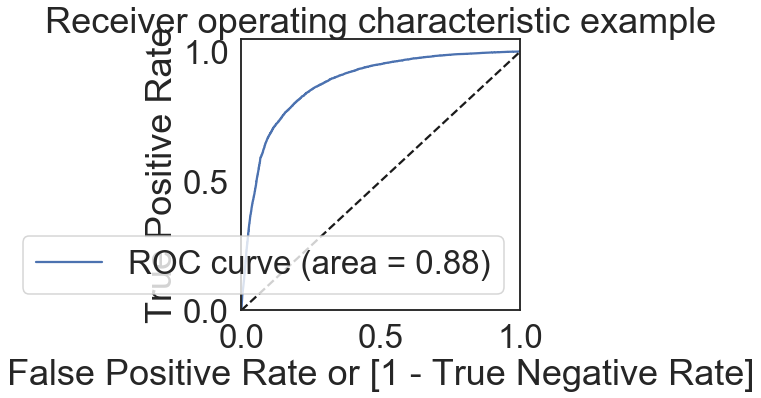

In [226]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

Finding Optimal Cutoff Point

In [227]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000142,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.072297,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.394527,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.292736,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.245002,0,1,1,1,0,0,0,0,0,0,0,0


In [228]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.658406  0.978461  0.338350
0.2   0.2  0.717120  0.955911  0.478328
0.3   0.3  0.759932  0.926182  0.593682
0.4   0.4  0.787986  0.887677  0.688294
0.5   0.5  0.803170  0.840185  0.766154
0.6   0.6  0.803329  0.768548  0.838111
0.7   0.7  0.782694  0.656385  0.909004
0.8   0.8  0.690129  0.421050  0.959209
0.9   0.9  0.584880  0.184492  0.985268


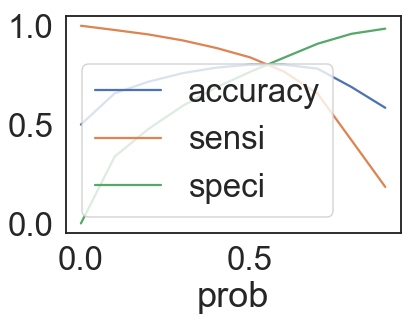

In [229]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [230]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

,churn,churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000142,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.072297,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.394527,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.292736,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.245002,0,1,1,1,0,0,0,0,0,0,0,0


In [231]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.8044992820294634

In [232]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[15080,  3723],
       [ 3629, 15174]], dtype=int64)

In [233]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [234]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.806998883156943

In [235]:
# specificity
TN / float(TN+FP)

0.8019996809019837

In [236]:
#  false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19800031909801627


In [237]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8029846007302747


In [238]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8060291838152761


### Negative predictive value must be as high as possible because this would tell that how much percent of the customer predicted as non-churn are actually not churning. In other words, this algorithm is giving us approx. 20% customers as non-churn but who have actually churned

Making predictions on the test set

In [255]:
df_test_id=df_test.pop('mobile_number')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_test.values)
df_test = pd.DataFrame(scaled_features, index=df_test.index, columns=df_test.columns)
df_test.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,total_amt_6,total_amt_7,average_rech_amt_6&7,arpu_6&7,onnet_mou_6&7,offnet_mou_6&7,roam_ic_mou_6&7,roam_og_mou_6&7,loc_og_mou_6&7,std_og_mou_6&7,isd_og_mou_6&7,spl_og_mou_6&7,og_others_6&7,total_og_mou_6&7,loc_ic_mou_6&7,std_ic_mou_6&7,total_ic_mou_6&7,spl_ic_mou_6&7,isd_ic_mou_6&7,ic_others_6&7,total_rech_num_6&7,max_rech_amt_6&7,last_day_rch_amt_6&7,vol_3g_mb_6&7,monthly_2g_6&7,monthly_3g_6&7,sachet_2g_6&7,sachet_3g_6&7,vbc_3g_6&7,churn
42800,0.013306,0.000667,0.002164,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.001123,0.000000,0.000000,0.000507,0.000000,0.000000,0.000000,0.0,0.004034,0.088805,0.001342,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.029869,0.0,0.002539,0.000078,0.001425,0.000859,0.003743,0.002927,0.000730,0.000350,0.000000,0.002099,0.002007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.001985,0.0,0.000000,0.000000,0.088235,0.000000,0.005207,0.003382,0.007355,0.000,0.186047,0.000000,0.053121,0.040702,0.00000,0.0,0.153846,0.0,0.0,0.104556,0.0,0.000000,0.045226,0.015483,0.034218,0.000000,0.000104,0.000000,0.000000,0.000000,0.000000,0.0,0.000756,0.000000,0.000093,0.004595,0.000000,0.002529,0.000000,0.000000,0.000000,0.035484,0.003789,0.004262,0.0,0.000000,0.0,0.181818,0.0,0.0,0.0
13276,0.020498,0.005517,0.006265,0.000000,0.0,0.0,0.0,0.009517,0.008549,0.009288,0.083914,0.045969,0.024741,0.000000,0.006205,0.000000,0.0,0.000000,0.000000,0.024787,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.009402,0.010928,0.026692,0.019597,0.111182,0.046886,0.017902,0.005433,0.010667,0.010489,0.037317,0.000000,0.000000,0.000088,0.000000,0.005853,0.000000,0.0,0.00000,0.000000,0.000088,0.036995,0.0,0.000000,0.000144,0.029412,0.063454,0.026036,0.012252,0.029420,0.000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.009211,0.0,0.026222,0.013302,0.007793,0.073299,0.008971,0.032337,0.000000,0.000000,0.054759,0.000000,0.0,0.002481,0.015365,0.035632,0.114032,0.001612,0.064406,0.002344,0.000000,0.000600,0.119355,0.033343,0.020457,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
20855,0.030401,0.009727,0.029894,0.000000,0.0,0.0,0.0,0.022900,0.018617,0.016374,0.101885,0.125095,0.113636,0.025487,0.025195,0.017493,0.0,0.000000,0.001022,0.092093,0.00000,0.000149,0.000001,0.000970,0.000416,0.000000,0.000000,0.0,0.0,7.153045e-07,0.0,0.006862,0.0,0.035399,0.024452,0.025177,0.009054,0.066123,0.070596,0.051487,0.015796,0.004521,0.003394,0.059994,0.000000,0.000000,0.000130,0.000000,0.000000,0.001303,0.0,0.00000,0.000000,0.000729,0.059981,0.0,0.000000,0.000000,0.098039,0.047037,0.030358,0.023916,0.038247,0.000,0.000000,0.000000,0.000000,0.084228,0.00001,0.0,0.038462,0.0,0.0,0.359223,0.0,0.019438,0.015510,0.005043,0.066735,0.020599,0.054167,0.000000,0.000000,0.096505,0.000620,0.0,

In [256]:
y_test = df_test.pop('churn')
X_test = df_test

In [257]:
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

42800    0.223654
13276    0.573823
20855    0.050364
63952    0.021161
67017    0.737791
54596    0.010015
7906     0.145235
21586    0.002265
48761    0.530962
1641     0.167069
dtype: float64

In [258]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame({'Churn_Prob': y_test_pred})
y_pred_1.head()

,Churn_Prob
42800,0.223654
13276,0.573823
20855,0.050364
63952,0.021161
67017,0.737791


In [259]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [260]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [261]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [262]:
y_pred_final.head()

,churn,Churn_Prob
0,0.0,0.223654
1,0.0,0.573823
2,0.0,0.050364
3,0.0,0.021161
4,0.0,0.737791


In [263]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_pred_final.head()

,churn,Churn_Prob,final_predicted
0,0.0,0.223654,0
1,0.0,0.573823,1
2,0.0,0.050364,0
3,0.0,0.021161,0
4,0.0,0.737791,1


In [264]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8247833216209886

In [265]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6719, 1350],
       [ 146,  323]], dtype=int64)

In [266]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [267]:
#  sensitivity 
TP / float(TP+FN)

0.6886993603411514

In [268]:
#  specificity
TN / float(TN+FP)

0.8326930226793903

In [270]:
# Predictive value when the customer actually churns but the algorithm predicts it non-churn
print (FN / float(TP+ FP))

0.08726838015540944


In [271]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9787327021121631


### Negative predictive value must be as high as possible because this would tell that how much percent of the customer predicted as non-churn are actually not churning. In other words, this algorithm is giving us only 3% customers as non-churn but who have actually churned

In [348]:
# Negative predictive values for each of the model 
logistic_with_pca = 0.9363711001642037
logistic_with_class_imbalance = 0.9358600583090378
random_forest = 0.9441478439425052
random_forest_tuned = 0.9441707717569786
random_forest_without_class_imbalance = 0.9441707717569786
random_forest_tuned_without_class_imbalance = 0.9441707717569786
logistict_without_pca = 0.9787327021121631

In [374]:
ls = pd.DataFrame({'model':['logistic_with_pca','logistic_with_class_imbalance', 'random_forest', 'random_forest_tuned', 'random_forest_without_class_imbalance', 'random_forest_tuned_without_class_imbalance', 'logistic_without_pca'], 'negative_predictive_value':[logistic_with_pca,logistic_with_class_imbalance, random_forest, random_forest_tuned, random_forest_without_class_imbalance, random_forest_tuned_without_class_imbalance, logistict_without_pca]})
ls

,model,negative_predictive_value
0,logistic_with_pca,0.936371
1,logistic_with_class_imbalance,0.935860
2,random_forest,0.944148
3,random_forest_tuned,0.944171
4,random_forest_without_class_imbalance,0.944171
5,random_forest_tuned_without_class_imbalance,0.944171
6,logistic_without_pca,0.978733


[Text(0,0.5,'Negative Predictive Value'), Text(0.5,0,'Model')]

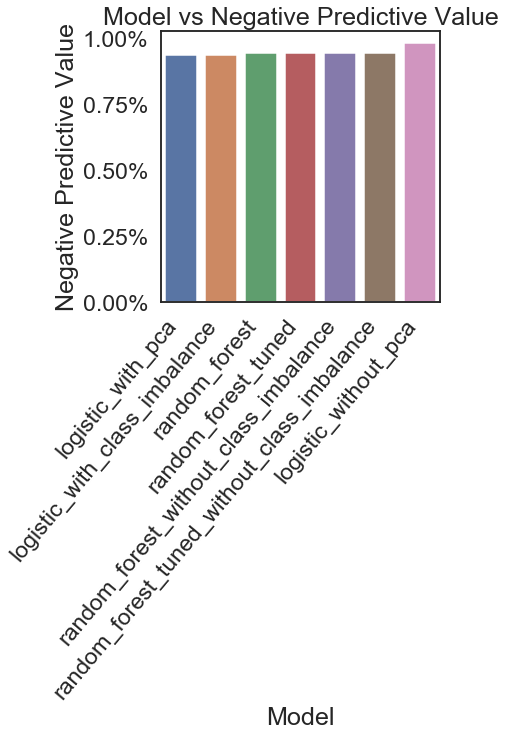

In [376]:
plt.figure(figsize = (5,5))

plt.title('Model vs Negative Predictive Value')
ax = sns.barplot(x=ls.model, y = ls.negative_predictive_value)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
sns.set_context("talk", font_scale=1.4)
ax.set(xlabel="Model", ylabel = "Negative Predictive Value") 

### As we know in case of telecom churn prediction, even if we predict a customer as churn but actually who is not churning, it won't affect much. The reason behind this is, the company might end up providing offers to these customers & which would eventually result into the retaining of these customers. <br><br> But the most important part is the prediction of customer as non-churn but in actual who is churning. Therefore, negative predictive value must be maximum so as to avoid any customer loss. Also, would help targeting these customers for retention by marketing strategies.<br> <br> Therefore, the model logistic regression without any pca proves to be the best model in these terms.

### Important features that are strong predictiors of churn are :

* total_og_mou_8 
* total_ic_mou_6&7
* loc_ic_t2m_mou_8
* loc_og_mou_8
* monthly_2g_8
* monthly_3g_8 
* sachet_2g_8